
Chapter Five: Linked lists
**************************

In this chapter, we introduce a data structure known as a *linked list*,
which provides an alternative to the array-based sequence of Python.
Both array-based sequences and linked lists keep elements in a certain order, using a very different style.
An array provides a centralized representation,
with one part of memory used to accommodating references to the elements.
A linked list relies on a more distributed representation in which an object, known as a *node*,
is allocated for each element. Each node maintains a reference to its element and one or more references to neighboring
nodes in order to represent the linear order of the sequence.

As usual, there is a trade-off to take into consideration, when comparing array-based sequences and linked lists.
Elements of a linked list cannot be efficiently accessed by a numeric index,
and we cannot tell, by examining a node, its position in the list.
However, linked lists avoid some disadvantages noted above for array-based sequences.

Section 1. Singly Linked Lists
------------------------------

A *singly linked list* is a collection of nodes that form a linear sequence.
Each node stores a field *element*, that is a reference to an object of the sequence,
as well as a field *next*, that is a refererence to the subsequent node of the list,
as in the following figure.

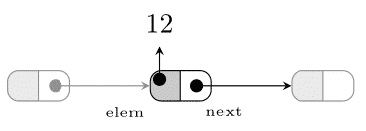

The first and last node of a linked list are known as the *head* and *tail* of the
list, respectively. The process of moving from one node to the next,
following each node’s *next* reference, until the tail of the list is reached,
is called *traversing* the linked list, or *link hopping*, or *pointer hopping*.
The tail is the node having *None* as its next reference.

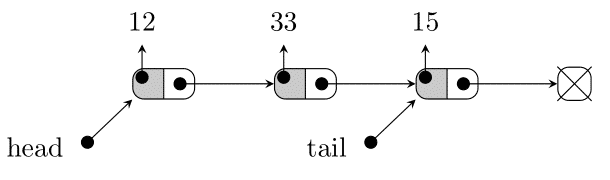


Each node is represented as an object that stores a reference to its element and a reference to the next node.
To represent the whole list we must keep a reference to the head of the list.
Every other node can be located by traversing the list;
this implies that there is no need to store a direct reference to the tail of the list,
even if this is a common practice to avoid such a traversal.
Similarly, the total number of nodes (the *size*) of the list is stored,
in order to avoid to traverse the list to count the nodes.
For sake of simplicity, we will consider that a node’s element as embedded directly within the node structure,
as in the following figure.

figura53.png

**Inserting an Element at the Head of a Singly Linked List**

A linked list does not have a predetermined fixed size, being this size equal or proportional
to the current number of elements.
A new element can be inserted at the head of the list, as shown in the following pseudo-code.
A new node instance is created, its element is set to the new element, its next link refers
to the current head, and the list’s head is set to point to the new node::

    1  add_first(L,e):
    2    newnode = Node(e)
    3    newnode.next = L.head
    4    L.head = newnode
    5    L.size = L.size+1

In the following figure we show the insertion of an element at the head of the list, before
the insertion, after creation of a new node, and after reassignment of the head, respectively.

figura54.png

**Inserting an Element at the Tail of a Singly Linked List**

An element can be inserted at the tail of the list, provided we keep a reference to the tail node,
as shown in the following pseudo-code. A new node is created, with its next reference equal to
None, the next reference of the current tail pointing to this new node,
and with the tail reference itself updated to this new node::

    1  add_last(L,e):
    2    newnode = Node(e)
    3    newnode.next = None
    4    L.tail.next = newnode
    5    L.tail = newnode
    6    L.size = L.size+1


In the following figure we show the insertion of an element at the tail of a singly linked list,
before the insertion, after creation of a new node, and after reassignment of the tail reference,
respectively.

figura55.png

**Removing an Element from a Singly Linked List**

This operation is illustrated in the following code fragment::

    1  remove_first(L):
    2    if L.head == None: error  # the list is empty
    3    L.head = L.head.next
    4    L.size = L.size−1

In the following figure we show the removal of an element at the head of a singly linked list,
before the removal, after dimissing the old head, and in its final configuration,
respectively.

figura56.png

Note that deleting the last node of a singly linked list is not an easy task.
In order to do this, we must be able to access the node *before* the last node,
and this can be done uniquely by starting from the head of the list and searching
all the way through it. This requires a number of link-hopping that is equal to the
size of the list. If we want to support such an operation efficiently,
we will need to make our list doubly linked.

Section 1.1 Implementing a Stack with a Singly Linked Lists
===========================================================

In this section, we provide a Python implementation of the stack abstract data type, by means of a singly linked list.
Since all stack operations affect the top, we orient the top of the stack at the head of the list.
This is the best choice: we can efficiently insert and delete elements in constant time at the head of the list.

A ``_Node`` class is defined in order to represent each node of the list;
this class must not be directly accessible by the user of the stack,
so we define it as a nonpublic, nested class of the ``LinkedStack`` class.
The definition of  ``_Node`` is shown in the following code::

    class _Node:
        __slots__ = '_element' , '_next'  # streamline memory usage

        def __init__ (self, element, next):  # initialize node’s fields
            self._element = element  # reference to user’s element
            self._next = next  # reference to next node

A node has two instance variables: ``_element`` and ``_next``.
We define ``__slots__`` to streamline the memory usage, because there may be many node instances in a single list.
The constructor of the ``_Node`` class is designed in order to allow us to
specify initial values for both fields of a newly created node.

In the following code, each stack instance maintains two variables.
The ``_head`` member is a reference to the node at the head of the list (``None``, if the stack is empty).
The ``_size`` variable keeps track of the current number of elements.

The implementation of ``push`` is similar to the pseudo-code for insertion at the head of a
singly linked list, as outlined previously.
When pushing a new element onto the stack, we change the linked structure
by calling the constructor of the ``_Node`` class as follows::

    self._head = self._Node(e, self._head)

Note that the ``_next`` field of the new node is set to the existing top node, and then
``self._head`` is reassigned to the new node:

In [2]:
class Empty(Exception):  # see chapter 4
    pass


class LinkedStack:
    '''Stack implementation with a singly linked list'''

    # Node class nested in stack
    class Node:
        __slots__ = '_element' , '_next'
        def __init__(self, element, next):
            self._element = element
            self._next = next

    # Stack methods
    def __init__(self):
        self._head = None
        self._size = 0

    def __len__(self):
        return self._size

    def is_empty(self):
        return self._size == 0

    def push(self, e):
        self._head = self._Node(e, self._head)
        self._size += 1

    def top(self):
        if self.is_empty( ):
            raise Empty('Stack is empty')
        return self._head._element

    def pop(self):
        if self.is_empty( ):
            raise Empty('Stack is empty')
        answer = self._head._element
        self._head = self._head._next
        self._size -= 1
        return answer

The goal of the ``top`` method is to return the element that is at the top of the stack.
When the stack is empty, an ``Empty`` exception is raised.
When the stack is nonempty, ``self._head`` is the reference to the first node of the linked list,
and the top element is ``self._head._element``.
As for ``pop``, a local reference to the element that is stored at the node that is being removed
is mantained, and that element is returned.
Note that all of the methods, in the worst-case, use constant time.

Section 1.2 Implementing a Queue with a Singly Linked List
==========================================================

In this section, we provide a Python implementation of the queue abstract data type, by means of a singly linked list.
We need to perform operations on both ends of the queue, meaning that we maintain
a head and a tail references as instance variables for each queue.
We then align the front of the queue with the head of the list, and the back of the queue with the tail of the list;
thus, we are able to enqueue elements at the back, and dequeue them from the front.
The implementation of a LinkedQueue class is given in the following code:

In [3]:
class LinkedQueue:
    '''Queue implementation with a singly linked list'''

    class Node:
        __slots__ = '_element' , '_next'
        def __init__(self, element, next):
            self._element = element
            self._next = next 
            
    def __init__ (self):
        self._head = None
        self._tail = None
        self._size = 0
    
    def __len__ (self):
        return self._size
    
    def is_empty(self):
        return self._size == 0
    
    def first(self):
        if self.is_empty( ):
            raise Empty('Queue is empty')
        return self._head._element
    
    def dequeue(self):
        if self.is_empty( ):
            raise Empty('Queue is empty')
        answer = self._head._element
        self._head = self._head._next
        self._size -= 1
        if self.is_empty():  # special case if queue is empty
            self._tail = None  # removed head had been the tail
        return answer
 
    def enqueue(self, e):
        newnode = self._Node(e, None)
        if self.is_empty():
            self._head = newnode
        else:
            self._tail._next = newnode
        self._tail = newnode
        self._size += 1

Many aspects of the previous implementation are similar to those of the ``LinkedStack`` class;
for instance, the definition of the ``Node`` class.
The implementation of ``dequeue`` for ``LinkedQueue`` is similar to that of ``pop`` for ``LinkedStack``:
both remove the head of the linked list, with the difference that the queue maintains the tail reference.
In general, an operation at the head has no effect on the tail,
but when ``dequeue`` is called on a queue with one element, we remove the head and the tail of the list,
simultaneously; thus, we set ``self._tail`` to None.
Something similar happens in the implementation of ``enqueue``.
The new node is new tail, but when the new node is the only node in the list, it also becomes the new head;
otherwise the new node must be linked immediately after the already existing tail node.
All operations run in worst-case constant time, and the space usage is linear in the current number of elements.


Section 2. Circularly Linked Lists
----------------------------------

A linked lists in which the tail of the list uses its next reference to point back to the head
of the list is called a *circularly linked list*.
This offers a general model for data sets that are cyclic, that is,
which do not have any particular notion of a beginning and an end, but mantains a
reference to a particular node in order to use the list, instead.
Such a node is called the *current* node, and we advance through the nodes of the list
by using current.next.

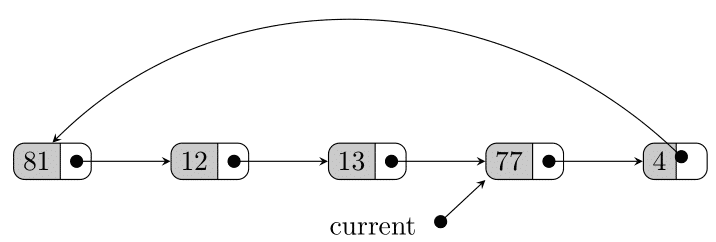

An example of use of a circularly linked list is the *round-robin scheduler*,
which iterates through a collection of elements in a circular fashion, and *services*
each element by performing a given action on it.
For example, this scheduler is used to allocate a resource that is shared by a number of clients
(such as slices of CPU time assigned to applications running on a computer).
A round-robin scheduler repeatedly performs the following steps on a queue Q::

    1 e = Q.dequeue()
    2 Service element e
    3 Q.enqueue(e)

These steps can be easily performed by using the ``LinkedQueue`` class introduced previously;
nevertheless, note that we have to remove a node from the list
(making adjustments to the head of the list and its size),
to create a new node, and to insert it at the tail of the list, increasing the size.
This can be avoided with a a circularly linked list, in which the transfer of an item from
the head to the tail of the list can be accomplished by simply advancing a reference
that marks the boundary of the queue.

In the next section, we provide an implementation of a ``CircularQueue`` class
that supports the queue ADT, with a new method ``rotate( )`` that moves the first element of the queue
to the back. A round-robin schedule can be implemented by repeatedly performing the following steps:

 1. Service element Q.front()
 2. Q.rotate()

Section 2.1 Implementing a Queue with a Circularly Linked List
==============================================================

To implement the queue ADT with a circularly linked list, we rely on the previous idea that
the queue has a head and a tail, with the next reference of the tail linked to the head.
In this case, the only two instance variables are ``_tail``,
which is a reference to the tail node (or None when empty),
and ``_size``, the current number of elements in the queue.
We will be able to find the head of the queue simply by following the tail’s next reference,
that is ``self._tail._next``.
We can enqueue a new node by placing it after the tail and before the current head, and
making it the new tail.
In order to implement the operation of removing the front of the queue and inserting it
at the back, we add the method ``rotate``, that basically sets ``self._tail = self._tail._next``
(the old head becomes the new tail, and the node after the old head becomes the new head).
The complete implementation is given in the following code:

In [4]:
class CircularQueue:
    '''Queue implementation using circularly linked list'''

    class _Node:
        __slots__ = '_element' , '_next'
        def __init__(self, element, next):
            self._element = element
            self._next = nex

    def __init__(self):
        self._tail = None
        self._size = 0
    
    def __len__ (self):
        return self._size
    
    def is_empty(self):
        return self._size == 0
    
    def first(self):
        if self.is_empty( ):
            raise Empty('Queue is empty')
        head = self._tail._next
        return head._element
    
    def dequeue(self):
        if self.is_empty( ):
            raise Empty('Queue is empty')
        oldhead = self._tail._next
        if self._size == 1:
            self._tail = None
        else:
            self._tail._next = oldhead._next
        self._size -= 1
        return oldhead._element
    
    def enqueue(self, e):
        newnode = self._Node(e, None)
        if self.is_empty( ):
            newnode._next = newnode
        else:
            newnode._next = self._tail._next
            self._tail._next = newnode
        self._tail = newnode
        self._size += 1

    def rotate(self):
        if self._size > 0:
            self._tail = self._tail._next

Section 3. Doubly Linked Lists
------------------------------

There are a few limitations in the design of a singly listed list.
While we can efficiently insert a node at either end of such a list,
and we can delete a node at the head of a list, we cannot efficiently delete a node
at the tail of the list, or a node from each internal position.
This happens because we need to update the ``next`` reference of the
node that preceeds the node to be deleted, too.

A *doubly linked list* is a list in which each node mantains a reference to
the node after it (namely, ``next``), and to the node before it (namely, ``prev``).
We will see that this allows simple insertion and deletion at arbitrary positions within the list.

**Header and Trailer Sentinels**

The standard implementation of a doubly linked list involves two special nodes
at both ends of the list, the *header* and the *trailer*, respectively.
They act as sentinels, and they do not store any element.

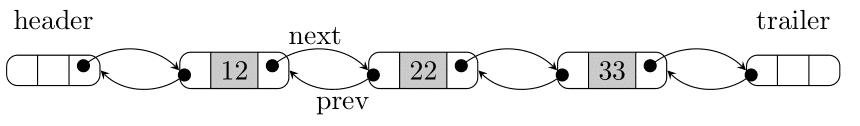

In an empty list, the ``next`` field of the header points to the trailer,
and the ``prev`` field of the trailer points to the header.
For a nonempty list, the header’s ``next`` refers to the node containing the first
element of the sequence, and the trailer’s ``prev`` refers to the node containing the
last element of a sequence.
Adding the two extra nodes simplifies the required operations.
In particular, all insertions are made in the same way, because a new node will always be
placed between a pair of existing nodes.
Similarly, every element to be deleted is always stored between two neighbors, on each side.
No special case is required when the list is empty.

**Insertion and deletion with a Doubly Linked List**

Every insertion into a doubly linked list will take place between a pair of existing nodes.
For example, when a new element is inserted at the front of the sequence,
the new node goes between the header and the node that is currently after the header.
We show, in the following figure, what happens when we add an element to a doubly linked list
with header and trailer sentinels, before the operation, after creating the new node, and
after connecting the neighbors to the new node.

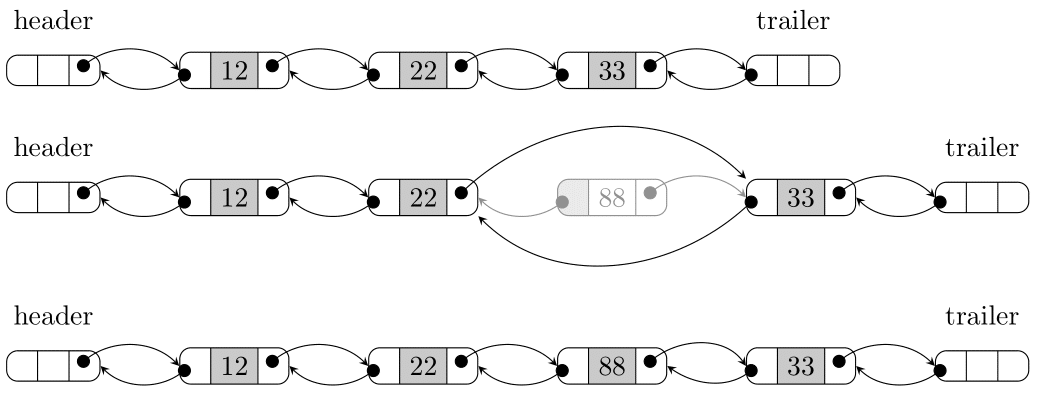

The following figure shows how to add an element to the front of a doubly linked list;
note that the procedure is the same of the general insertion.

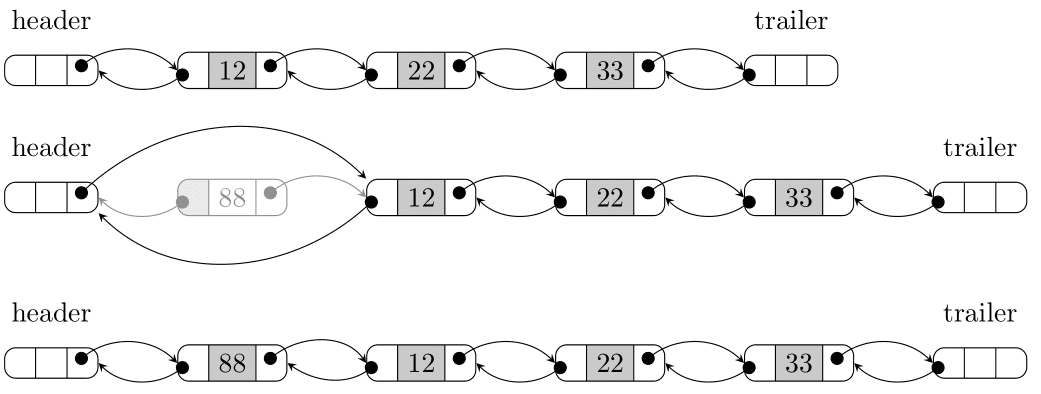

As for the deletion of a node, the two neighbors of the node to be deleted are linked directly
to each other, bypassing the original node. Thus, that node is no
longer a member of the list. The same implementation is be used when deleting the first
(or the last) element of a sequence, because even such an element will be stored in a
node that lies between two others.

figura511.png

Section 3.1 Basic Implementation of a Doubly Linked List
========================================================

In what follows, we provide an implementation of a doubly linked list, namely the class ``DoublyLinkedBase``.
This is a low level class, meaning that we do not provide an interface for it.
We will see that insertions and deletions can be performed in \\(O(1)\\) time, in the worst case,
when we are able to identify the location of a specific node into the list.

The ``Node`` class we are using here is similar to that for a singly linked list,
but includes a ``prev`` attribute, in addition to the ``next`` and ``element`` attributes.
The constructor of the list instantiates the two sentinel nodes and links them directly to each
other. A ``size`` member is mantained:

In [5]:
class _DoublyLinkedBase:
    
    class Node:
        __slots__ = '_element' , '_prev' , '_next'
        def __init__(self, element, prev, next):
            self._element = element
            self._prev = prev  # previous node reference
            self._next = next  # next node reference
   
    def __init__(self):
        self._header = self._Node(None, None, None)
        self._trailer = self._Node(None, None, None)
        self._header._next = self._trailer  # trailer is after header
        self._trailer._prev = self._header  # header is before trailer
        self._size = 0

    def __len__(self):
        return self._size

    def is_empty(self):
        return self._size == 0

    def _insert_between(self, e, predecessor, successor):
        newnode = self._Node(e, predecessor, successor)
        predecessor._next = newnode
        successor._prev = newnode
        self._size += 1
        return newnode

    def _delete_node(self, node):
        predecessor = node._prev
        successor = node._next
        predecessor._next = successor
        successor._prev = predecessor
        self._size -= 1
        element = node._element  # record deleted element
        node._prev = node._next = node._element = None  # useful for the garbage collection
        return element  # return deleted element

The methods ``_insert_between`` and ``_delete_node`` are designed as nonpublic utilities;
they support insertions and deletions, respectively, and they require one or more node references
as parameters.
The former creates a new node, with the fields initialized to connect to the specified neighboring nodes;
then, the fields of the neighboring nodes are updated to include the newest node in the list.
The method returns a reference to the new node.
The latter links to each other the neighbors of the node to be deleted, meaning that this is bypassed from the list.
The fields ``prev``, ``next``, and ``element`` are set to None,
because this could help the Python’s garbage collector.


Section 3.2 Implementing a Deque with a Doubly Linked List
==========================================================

The double-ended queue (deque) ADT can be implemented with an array,
and all operations works in *amortized* \\(O(1)\\) time, due to the need to resize the array.
The same data structure can be implemented with a doubly linked list;
in this case, all deque operations works in *worst-case* \\(O(1)\\) time.
The following implementation of a ``LinkedDeque`` class inherits from
the previuos ``_DoublyLinkedBase`` class;
we rely on the inherited methods ``__init__`` (to initialize a new instance),
``__len__``, ``is_empty``, as well as ``_insert_between`` (to insert an element at the front or at the end)
and ``_delete_node`` (to delete an element).
As expected, when inserting an element at the front of the deque, we place it immediately
between the header and the node just after the header; an insertion at the end of
the deque is placed immediately before the trailer node.
These operations succeed even when the deque is empty;
in this case, the new node is placed between the two sentinels:

In [6]:
class LinkedDeque(_DoublyLinkedBase):

    def first(self):
        if self.is_empty( ):
            raise Empty("Deque is empty")
        return self._header._next._element
    
    def last(self):
        if self.is_empty( ):
            raise Empty("Deque is empty")
        return self._trailer._prev._element

    def insert_first(self, e):
        self._insert_between(e, self._header, self._header._next)

    def insert_last(self, e):
        self._insert_between(e, self._trailer._prev, self._trailer)

    def delete_first(self):
        if self.is_empty( ):
            raise Empty("Deque is empty")
        return self._delete_node(self._header._next)

    def delete_last(self):
        if self.is_empty( ):
            raise Empty("Deque is empty")
        return self._delete_node(self._trailer._prev)

Section 4. Positional Lists
---------------------------

Stacks, queues, and double-ended queues allow operations at the beginning or at the end
of a sequence (or both, in the last case).
In this section, we introduce an abstract data type that provides
a way to refer to elements anywhere in a sequence, and to perform arbitrary insertions and deletions;
this is called a *positional list ADT*.

A straightforward way to implement such a structure is to use an array-based sequence,
in which integer indices indicate the location of an element, or the
location at which an insertion or deletion should take place.
However, one cannot efficiently find an element of a linked list knowing only its index,
because this operation requires traversing the list, starting from the beginning or end, and counting
the elements. Moreover, the index of an entry may change, due to insertions
or deletions that happen in the sequence.

We need an abstraction in which there is some other way for describing a position,
and for handling situations such as deleting or inserting an element from/into the list in \\(O(1)\\) time.
Such an abstraction could be based on a linked list, because the node reference could be used
for describing the position of each element into the sequence; random insertion and deletion are
already implemented with methods like ``_insert_between`` and ``_delete_node``, that accept
node references as parameters.
Even if this is an appealing solution, there are some  reasons to not use it.
First, such a direct use of node's reference violates abstraction and
encapsulation principles, because it allows the users to manipulate the nodes directly,
potentially invalidating the consistency of the list.
Then, it is preferable to design a more flexible, usable and robust data structure,
in which low-level details are not accessible by the user, and that can be easily redesigned
to improve its performance.
In this way, we can also provide a notion of a nonnumeric position, even if using an array-based sequence.
For these reasons, instead of relying directly on nodes, we introduce an independent
position abstraction to denote the location of an element within a list, and
then a complete positional list ADT that can encapsulate a doubly linked list.

Section 4.1 The Positional List Abstract Data Type
==================================================

In order to define an abstraction of a sequence of elements, together with a way to
identify the location of an element, we introduce a *positional list ADT* and a *position* abstract data type.
A position is a marker within the list, and must be unaffected by changes in the list;
a position becomes invalid only if an explicit command is issued to delete it.
The method ``p.element( )`` returns the element stored at position ``p``.

The methods supported by a list **L** are:

- **L.first( )**: return the position of the first element of **L**, or None if **L** is empty;
- **L.last( )**: return the position of the last element of **L**, or None if **L** is empty;
- **L.before(p)**: return the position of **L** immediately before position **p**, or None if **p** is the first position;
- **L.after(p)**: return the position of **L** immediately after position **p**, or None if **p** is the last position;
- **L.is_empty( )**: return True if list **L** does not contain any elements;
- **len(L)**: return the number of elements in the list;
- **iter(L)**: return a forward iterator for the elements of the list.

The positional list ADT also includes the following update methods:

- **L.add_first(e)**: insert a new element **e** at the front of **L**, returning its position;
- **L.add_last(e)**: insert a new element **e** at the back of **L**, returning its position;
- **L.add_before(p, e)**: insert a new element **e** before position **p** in **L**, returning its position;
- **L.add_after(p, e)**: insert a new element **e** after position **p** in L, returning its position;
- **L.replace(p, e)**: replace the element at position **p** with element **e**, returning the element that was at position **p**.
- **L.delete(p)**: remove and return the element at position **p** in **L**, invalidating the position.

An error occurs if ``p`` is not a valid position for list.
Note that the ``first( )`` and ``last( )`` methods return the associated positions;
the first element of a positional list can be determined by invoking ``L.first().element()``.
This is used to to navigate the list.
For example, the following code prints all elements of a positional list ``poslis``::

    marker = poslis.first( )
    while marker is not None:
        print(marker.element( ))
        marker = poslis.after(marker)

None is returned when ``after`` is called on the last position.
Similarly, None is returned when the ``before`` method is invoked at the front of the list, or
when ``first`` or ``last`` are called on an empty list.
The following table shows a series of operations on a positional list L.
Variables such as p, q, and r are used to identify position instances.


|Operations|Value returned|L|
|--|--|--|
|L.add_last(3)|p|3p
|L.first( )|p|3p
|L.add_after(p,5)|q|3p, 5q
|L.before(q)|p|3p, 5q
|L.add_before(q,3)|r|3p, 3r, 5q
|r.element( )|3|3p, 3r, 5q
|L.after(p)|r|3p, 3r, 5q
|L.add first(7)|s|7s, 3p, 3r, 5q
|L.delete(L.last( ))|5|7s, 3p, 3r
|L.replace(p,10)|3|7s, 10p, 3r


Section 4.2 Doubly Linked List Implementation
=============================================

In this section, we provide an implementation of a ``PositionalList`` class
using a doubly linked list; each method of the class runs in worst-case \\(O(1)\\)
time. To do this, we use the ``DoublyLinkedBase`` introduced previously,
and we build a public interface in accordance with the positional list ADT requirements.

The public ``Position`` class is nested within the  ``PositionalList`` class, and its
instances represent the locations of elements within the list.
The methods of ``PositionalList`` can create ``Position`` instances that are redundant,
that is, that refer the same node (for instance, when first and last node are the same).
For that reason, methods ``__eq__`` and ``__ne__`` are defined to check if two positions
refer to the same node.

The nonpublic method ``_validate`` checks if a position is valid, and determine the underlying node.
Note that a position maintains a reference to a node of the linked list,
and also a reference to the list instance that contains that node.
This implies that we are able to detect when a position instance does not belong to the indicated list,
and when a position instance is valid, but it refers to a node that is no longer part of that list
(this can be done easily, because the ``_delete_node`` of the base class
sets the previous and next references of a deleted node to None).
In order to access the positional list we define methods that use ``_validate``
in order to "unwrap" any position, and ``_make_position`` to "wrap" nodes as ``Position`` instances
to return to the user:

In [7]:
class PositionalList(_DoublyLinkedBase):
    '''A sequential container of elements with positional access'''

    class Position:
        '''The location of a single element'''
        def __init__ (self, container, node):
            self._container = container
            self._node = node
        
        def element(self):
            return self._node._element

        def __eq__ (self, other):
            '''Returns True if other is a position representing the same location'''
            return type(other) is type(self) and other._node is self._node

        def __ne__ (self, other):
            '''Returns True if other does not represent the same location'''
            return not (self == other)

    #------------------------------- utility methods -------------------------------

    def _validate(self, p):
        '''Returns node in position p, or raise error if invalid'''
        if not isinstance(p, self.Position):
            raise TypeError('p must be proper Position type')
        if p._container is not self:
            raise ValueError('p does not belong to this container')
        if p._node._next is None:  # invalid node
            raise ValueError('p is no longer valid')
        return p._node

    def _make_position(self, node):
        '''Returns Position instance for given node (None if sentinel)'''
        if node is self._header or node is self._trailer:
            return None
        else:
            return self.Position(self, node)

    #------------------------------- accessors -------------------------------

    def first(self):
        '''Returns the first Position in the list'''
        return self._make_position(self._header._next)

    def last(self):
        '''Returns the last Position in the list'''
        return self._make_position(self._trailer._prev)

    def before(self, p):
        '''Returns the Position before Position p'''
        node = self._validate(p)
        return self._make_position(node._prev)

    def after(self, p):
        '''Returns the Position after Position p'''
        node = self._validate(p)
        return self._make_position(node._next)

    def __iter__(self):
        '''Generate a forward iteration of the elements of the list'''
        cursor = self.first( )
        while cursor is not None:
            yield cursor.element( )
            cursor = self.after(curso)
                            
    #--- Ihe following code we introduce the update methods
    #--- inherited version overridden, returns Position, rather than Node
    def _insert_between(self, e, predecessor, successor):
        '''Adds element between existing nodes and return new Position'''
        node = super()._insert_between(e, predecessor, successor)
        return self._make_position(node)

    def add_first(self, e):
        '''Inserts element e at the front of the list and returns Position'''
        return self._insert_between(e, self._header, self._header._next)

    def add_last(self, e):
        '''Inserts element e at the back of the list and returns Position'''
        return self._insert_between(e, self._trailer._prev, self._trailer)

    def add_before(self, p, e):
        '''Inserts element e into list before Position p and returns Position'''
        original = self._validate(p)
        return self._insert_between(e, original._prev, original)

    def add_after(self, p, e):
        '''Inserts element e into list after Position p and returns Position'''
        original = self._validate(p)
        return self._insert_between(e, original, original._next)

    def delete(self, p):
        '''Removes and returns the element at Position p'''
        original = self._validate(p)
        return self._delete_node(original)

    def replace(self, p, e):
        '''Replace the element at Position p with e'''
        original = self._validate(p)
        old_value = original._element  # temporarily store old element
        original._element = e  # replace with new element
        return old_value  # return the old element value

Section 5. Sorting a Positional List
------------------------------------

In this section, we introduce an implementation of the *insertion sort* algorithm
operating on a positional list. We maintain the variable ``marker``
that represents the rightmost position of the currently sorted portion of the list.
The pivot is the position immediately after the marker, and we use the variable
``move_left`` to move leftward from the marker, as long as there is a preceding element
with value larger than the pivot’s. In the following figure we show the situation of a list
during the process.

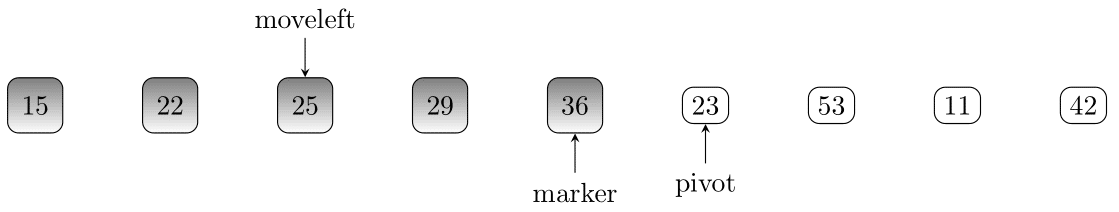

In what follow we show the code for the insertion sort:

In [8]:
def insertion_sort(L):
    if len(L) > 1:
        marker = L.first( )
        while marker != L.last( ):
            pivot = L.after(marker)
            value = pivot.element( )
            if value > marker.element( ):
                marker = pivot  # pivot becomes new marker
            else:
                move_left = marker  # find leftmost item greater than value
                while move_left != L.first( ) and L.before(move_left).element( ) > value:
                    move_left = L.before(move_left)
                L.delete(pivot)
                L.add_before(move_left, value)  # insert value before move_left

Section 6. Array-Based and Link-Based Sequences 
-----------------------------------------------

Array-based and link-based data structures have pro and cons.
In this section, we discuss some of them.

Section 6.1 Advantages of Array-Based Sequences
===============================================

In an array-based sequence, we are able to access a generic element within \\(O(1)\\)-time;
in contrast, locating the \\(k\\)-th element in a linked list requires
\\(O(k)\\)-time (i.e., *linear time* complexity), in order to traverse the list.

Array-based representations use less memory than linked structures.
Even if the length of a dynamic array may be longer than the number of elements
that it stores, we note that array-based lists and linked lists are both referential structures,
so the memory required for storing the actual elements is the same for either structure.
Morover, for an array-based container of \\(n\\) elements, the typical worst-case happens when a
resized dynamic array allocates memory for \\(2n\\) object references.
With linked lists, memory must be devoted not only to store a reference to each contained object,
but also for references that link the nodes.
Thus, a singly linked list of length \\(n\\) always requires \\(2n\\) references
(an element's reference and next reference for each node);
with a doubly linked list, there are \\(3n\\) references.

Operations with equivalent asymptotic bounds usually are more efficient of a constant factor
with array-based sequence, w.r.t. the same operations performed by a linked structure.
This happens because one needs to instantiate a new node when the linked versions of some
operations are performed, such as the typical enqueue operation for a queue.

Section 6.2 Advantages of of Link-Based Sequences
=================================================

If some operations on a given data structure are used in a real-time system,
that is designed to provide immediate responses, because a long delay caused by a single
(amortized) operation may have an adverse effect.
In this case, we observe that amortized bounds are associated to the expansion or
contraction of a dynamic array, while link-based structures provide
worst-case time bounds for their operations, directly.

Link-based structures support \\(O(1)\\)-time insertions and deletions at arbitrary positions.
This is the most important advantage of the linked list, in contrast to the array-based sequence.
Inserting or deleting an element from the end of an array-based list can be done in constant time;
but more general insertions and deletions are expensive.
A call to insert or pop with index \\(k\\), with Python’s array-based list class,
uses \\(O(n−k+1)\\)-time, because we must shift all subsequent elements.